In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.backend as K 
import keras

from tensorflow.keras import layers
from keras.layers import Input, Flatten, Dense, Conv2D, SeparableConv2D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_test[2]

array([[[0.61960787, 0.74509805, 0.87058824],
        [0.61960787, 0.73333335, 0.85490197],
        [0.54509807, 0.6509804 , 0.7607843 ],
        ...,
        [0.89411765, 0.90588236, 0.91764706],
        [0.92941177, 0.9372549 , 0.9529412 ],
        [0.93333334, 0.94509804, 0.9647059 ]],

       [[0.6666667 , 0.78431374, 0.8980392 ],
        [0.6745098 , 0.78039217, 0.8862745 ],
        [0.5921569 , 0.6901961 , 0.7882353 ],
        ...,
        [0.9098039 , 0.9098039 , 0.9254902 ],
        [0.9647059 , 0.9647059 , 0.98039216],
        [0.9647059 , 0.96862745, 0.9843137 ]],

       [[0.68235296, 0.7882353 , 0.88235295],
        [0.6901961 , 0.78431374, 0.87058824],
        [0.6156863 , 0.7019608 , 0.78039217],
        ...,
        [0.9019608 , 0.8980392 , 0.9098039 ],
        [0.98039216, 0.9764706 , 0.9843137 ],
        [0.9607843 , 0.95686275, 0.96862745]],

       ...,

       [[0.12156863, 0.15686275, 0.1764706 ],
        [0.11764706, 0.15294118, 0.17254902],
        [0.10196079, 0

In [5]:
y_train[3].shape

(1,)

In [6]:
y_train[3]

array([4], dtype=uint8)

In [7]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

y_train[3].shape

(10,)

In [8]:
y_train[3]   ## this is the output layer of the NN -> which is 10 of them = called onehot encoding/learning

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 10)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 10)

## NN Architecture

In [13]:
input_layer = Input( (32,32,3) )

hl1 = Flatten()(input_layer)

hl1 = Dense(200, activation='relu')( hl1 )
hl1 = Dense(150, activation='relu')( hl1 )
#which activation to use for the output layer??
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(hl1)  #need softmax because it adds up to 1 cuz of onehot learning

model = Model( input_layer, output_layer )

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## Train

In [15]:
opt = Adam(lr = 0.0005 )
model.compile( loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\mango\anaconda3\envs\py38_tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.fit(x_train,
         y_train,
         batch_size=32,       #
         epochs=10,           #number of times you give the data to the model
         shuffle=True
)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8310 - accuracy: 0.3392
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6551 - accuracy: 0.4094
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5722 - accuracy: 0.4404
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5262 - accuracy: 0.4578
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4905 - accuracy: 0.4689
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4569 - accuracy: 0.4802
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4319 - accuracy: 0.4901
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4044 - accuracy: 0.4996
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3811 - accuracy: 0.5080
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

# evaluate

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4373 - accuracy: 0.4917


[1.437337040901184, 0.4916999936103821]

In [18]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [19]:
preds.shape

(10000, 10)

In [20]:
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [21]:
n_to_show = 10
indicies = np.random.choice(range(len(x_test)), n_to_show)
indicies

array([3294, 7284, 9491, 7486, 2644, 2604, 4962, 9350, 5569,  147])

# Visualize preds

[3294 7284 9491 7486 2644 2604 4962 9350 5569  147]


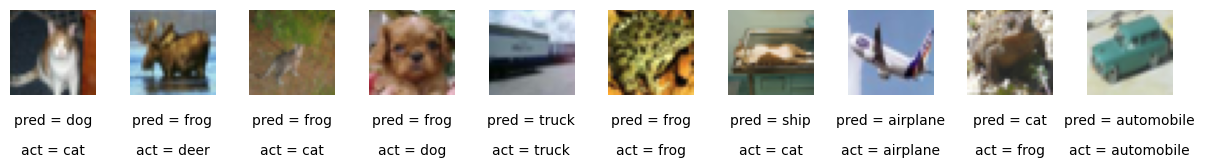

In [22]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
print(indicies)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [23]:
a = model.predict(x_test[1786])

1/1 [==============================] - 0s 130ms/step


In [24]:
a

array([[6.5792821e-02, 1.7781924e-01, 2.9480504e-02, 1.3024451e-02,
        5.9507955e-03, 3.1489346e-03, 2.1648544e-04, 1.5861880e-02,
        9.9461704e-02, 5.8924317e-01]], dtype=float32)

# Improving results using CNN

In [25]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,         #
    kernel_size = (4,4),  # size of the filter
    strides = 2,          # the number of pixels that it skips
    padding = 'same'      # when it doesn't match the result
)(input_layer)

conv_layer_2 = Conv2D(    
    filters = 20,         # filter
    kernel_size = (3,3),  # size of filter
    strides = 2,          # 
    padding = 'same'      #
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [1]:
#Train

In [2]:

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

NameError: name 'Adam' is not defined

In [ ]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)

# Testing

In [15]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.3579 - accuracy: 0.5127 - val_loss: 1.3763 - val_accuracy: 0.5268
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0124 - accuracy: 0.6451 - val_loss: 1.1128 - val_accuracy: 0.6175
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8786 - accuracy: 0.6930 - val_loss: 1.1445 - val_accuracy: 0.6003
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7860 - accuracy: 0.7241 - val_loss: 0.9749 - val_accuracy: 0.6611
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7144 - accuracy: 0.7501 - val_loss: 0.8265 - val_accuracy: 0.7161
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6561 - accuracy: 0.7701 - val_loss: 0.8928 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6121 - accuracy: 0.7852 - val_loss: 1.3229 -

In [18]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 120ms/step - loss: 0.9801 - accuracy: 0.6930


[0.9801296591758728, 0.6930000185966492]

## Deeper CNN

In [13]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = SeparableConv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)


x = Conv2D(filters = 32, kernel_size = (1,1), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = SeparableConv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = SeparableConv2D(filters = 32, kernel_size = (1,1), strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = (3,3), strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 separable_conv2d (Separable  (None, 32, 32, 32)       1344      
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128   

In [15]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\mango\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True, 
          validation_data = (x_test, y_test)
)

Epoch 1/10
  15/1563 [..............................] - ETA: 4:03 - loss: 3.1237 - accuracy: 0.1021

KeyboardInterrupt: 

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.8296 - accuracy: 0.7205


[0.8296054005622864, 0.7204999923706055]

## Pre-trained models

#### VGG16

In [17]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet152

In [40]:
model = keras.models.Sequential()
model.add(VGG16(weights='imagenet'))
model.summary()

553467096/553467096 [==============================] - 196s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


In [41]:
VGG = VGG16( include_top=False, input_shape=(32,32,3))

58889256/58889256 [==============================] - 23s 0us/step


In [42]:
for layer in VGG.layers:
    layer.trainable = False
    

for layer in VGG.layers:
    sp = '        '[len(layer.name)-9:]
    print(layer.name, sp, layer.trainable)

input_5    False
block1_conv1       False
block1_conv2       False
block1_pool        False
block2_conv1       False
block2_conv2       False
block2_pool        False
block3_conv1       False
block3_conv2       False
block3_conv3       False
block3_pool        False
block4_conv1       False
block4_conv2       False
block4_conv3       False
block4_pool        False
block5_conv1       False
block5_conv2       False
block5_conv3       False
block5_pool        False


#### Build architecture

In [43]:
model = keras.models.Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(units=NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
opt=Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=5,
         shuffle=True,
         validation_data=(x_test, y_test)
)

Epoch 1/5
1563/1563 [==============================] - 399s 254ms/step - loss: 1.6674 - accuracy: 0.4365 - val_loss: 1.4659 - val_accuracy: 0.5068
Epoch 2/5
1563/1563 [==============================] - 247s 158ms/step - loss: 1.3950 - accuracy: 0.5304 - val_loss: 1.3682 - val_accuracy: 0.5324
Epoch 3/5
1563/1563 [==============================] - 214s 137ms/step - loss: 1.3215 - accuracy: 0.5518 - val_loss: 1.3231 - val_accuracy: 0.5452
Epoch 4/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.2804 - accuracy: 0.5641 - val_loss: 1.2932 - val_accuracy: 0.5518
Epoch 5/5
1563/1563 [==============================] - 234s 149ms/step - loss: 1.2517 - accuracy: 0.5737 - val_loss: 1.2769 - val_accuracy: 0.5609


In [47]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 28s 3s/step - loss: 1.2769 - accuracy: 0.5609


[1.2769032716751099, 0.5608999729156494]

#### ResNet50

In [1]:
resnet = ResNet152(include_top=False, weights = 'imagenet', input_shape=(32,32,3), classes=10)

NameError: name 'ResNet152' is not defined

In [2]:
for layer in resnet.layers:
    layer.trainable = False

NameError: name 'resnet' is not defined

In [25]:
model = keras.models.Sequential()
model.add( resnet )
model.add( Flatten() )
model.add( Dense(units=NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 58,391,434
Trainable params: 20,490
Non-trainable params: 58,370,944
_________________________________________________________________


In [26]:
opt=Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=5,
         shuffle=True,
         validation_data = (x_test, y_test)
)

Epoch 1/5
1464/1563 [===========================>..] - ETA: 18s - loss: 2.2519 - accuracy: 0.1679

In [56]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 13s 1s/step - loss: 1.8446 - accuracy: 0.3465


[1.8446093797683716, 0.3465000092983246]